In [53]:
import os, sys, json, re
from collections import defaultdict
src_path = os.path.abspath(os.path.join(".."))
if src_path not in sys.path:
    sys.path.append(src_path)
    
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize, word_tokenize

from src.config import CaptionConfig
import matplotlib.pyplot as plt 

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
config_path = os.path.join(os.getcwd(), "..", "src","config.yml")
print(config_path)
caption_config = CaptionConfig(config_path) 
# print(word_tokenize("aren't"))

/Users/nsimsiri/Documents/code/ml/nlp/cap/notebooks/../src/config.yml
loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
loaded - val captions








### NLP statistics

# captions: 500


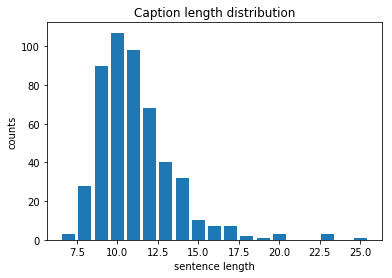

In [51]:
n_samples = 500

coco_caption = caption_config.get_coco_captions()
annIds = coco_caption.getAnnIds()
annIds = np.random.choice(annIds, size=n_samples, replace=False).tolist()
print("# captions: " + str(len(annIds)))

sentence_lens = defaultdict(int)
for annId in annIds:
    ann_i = coco_caption.loadAnns(annId)[0]
    tokens = word_tokenize(ann_i['caption'])
    sentence_lens[(len(tokens))]+=1

freqs = []
freq_keys = sorted(sentence_lens.keys(), reverse=True)
for sorted_freq in freq_keys:
    freqs.append(sentence_lens[sorted_freq])

topK = 500
plt.bar(freq_keys[:topK], freqs[:topK])
plt.title("Caption length distribution")
plt.ylabel("counts")
plt.xlabel("sentence length")
plt.show()



In [37]:
sorted([1,2,3], reverse=True)


<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

## token analysis

3589
(a, 8452)  (., 3704)  (on, 1843)  (of, 1724)  (the, 1695)  (in, 1527)  (with, 1373)  (and, 1200)  (is, 810)  (man, 639)  (to, 574)  (sitting, 444)  (,, 436)  (an, 407)  (two, 387)  (at, 371)  (standing, 352)  (next, 338)  (people, 328)  (are, 323)  (white, 315)  (woman, 284)  (table, 281)  (holding, 260)  (it, 258)  

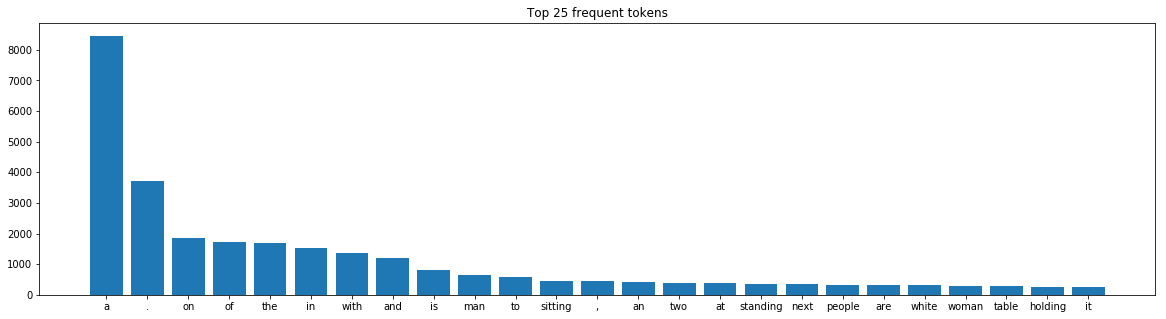

(., 3704)  (,, 436)  ('s, 71)  ('', 16)  (``, 15)  (close-up, 8)  (t.v, 4)  (multi-colored, 4)  (n't, 4)  (double-decker, 2)  (#, 2)  (-, 2)  (black-and-white, 2)  (half-eaten, 1)  (three-tier, 1)  (d'oeuvres, 1)  (large-screened, 1)  (two-way, 1)  (cross-country, 1)  (street.a, 1)  (cross-legged, 1)  (through-, 1)  (old-fashioned, 1)  (two-story, 1)  (traffic.and, 1)  (full-length, 1)  (cloth-covered, 1)  (corner-fitting, 1)  (;, 1)  (12:10, 1)  ('time, 1)  (', 1)  (stre.et, 1)  (tri-motor, 1)  (front-lit, 1)  (out-of-focus, 1)  (wood-grain, 1)  (stir-fry, 1)  (hree-story, 1)  (ice-cream, 1)  (cello-tape, 1)  (fair-goers, 1)  (ocean-side, 1)  (half-filled, 1)  (pyramid.., 1)  (solar-powered, 1)  (planes-, 1)  (coal-fired, 1)  ('do, 1)  (8:29, 1)  (t-shirt, 1)  (on-deck, 1)  (stand-up, 1)  (high-heeled, 1)  (built-in, 1)  (long-exposure, 1)  ($, 1)  (3.69, 1)  

In [88]:

n_samples = 5000
annIds = coco_caption.getAnnIds()
annIds = np.random.choice(annIds, size=n_samples, replace=True).tolist()

vocab = defaultdict(int)
punc = defaultdict(int)

x = re.search(r'\W+', "abcd513|zABC1239")
for annId in annIds:
    ann_i = coco_caption.loadAnns(annId)[0]
    caption = ann_i['caption']
    caption = caption.lower()
    tokens = word_tokenize(caption)
    for token in tokens:
        vocab[token]+=1
        nonalph = re.search(r'\W+', token)
        if nonalph is not None:
            punc[token]+=1

print(len(vocab))
topK = 25
vocab_sorted = sorted(vocab.keys(), reverse=True, key=lambda _key: vocab[_key])
vocab_val = []
for vocab_key in vocab_sorted[:topK]:
    print("({}, {}) ".format(vocab_key, vocab[vocab_key]), end=" ", flush=True)
    vocab_val.append(vocab[vocab_key])

vocab_X = range(len(vocab_val))
plt.figure(figsize=(20, 5))
plt.bar(vocab_X, vocab_val)
plt.xticks(vocab_X, vocab_sorted)
plt.title("Top {} frequent tokens".format(topK))
plt.show()

punc_sorted = sorted(punc.keys(), reverse=True, key=lambda _key: punc[_key])
for punc_key in punc_sorted:
    print("({}, {}) ".format(punc_key, punc[punc_key]), end=" ", flush=True)